## PHYS 481 Assignment 2
September 17, 2019

## Authors: 
Siegfried Peschke (30032136) \\
Matthew Bouchard (30003689) \\
Chris Godek (30030527)






## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy
from PIL import Image
import requests
from io import BytesIO
from google.colab import files
from heapq import heappush, heappop, heapify
from collections import defaultdict, Counter
from operator import itemgetter, attrgetter
import queue

## Problem 1: Checking for Uniform Sampling

**Problem:** Write a Python function to collect the outcomes of many rolls of a die (or the result of rolling more and more dice). Calculate the probabilities of obtaining the results 1 through 6 as a function of the number of rolls $N$, and plot the error (i.e. the difference between the calculated value and the theoretical value of 1/6) as a function of $N$ on a log-log plot. Fit the curve to a line and determine the slope. What do you find, and is this consistent with expectations?

In [0]:
def die_outcomes(N,Output):

  """

  --- General Description ---

  The purpose of this function is to determine the error in rolling a partiuclar side of a die
  after N roles. That is, say the probability after rolling N times is p. The expected probability
  for rolling a six-sided die would be (1/6). As such, this function will calculate the differential
  between the 'experimental' value p and the expected (1/6).

  --- How it Works ---

  This function works by first creating an empty list corresponding to each side of the die (1-6).
  Each time a side of the die is rolled, a counter will add +1 to the tally. So if rolled one time,
  and it just so happened to be a 4, you would add +1 to the number of times you rolled a 4 and your
  list would appear as: #_seen = [0,0,0,1,0,0]. Using the total number of rolls the function will then detemine
  the probability that you will role a particular side by dividing the number of times you rolled
  a particular face divided by the total number of times you rolled. It will then calculate the difference
  between the current probability at N roles and the expected probability of (1/6).

  --- Arguments ---

  N = The number of times for which you would like to roll the dice
  Output = The data you wish to have returned. (1 = Probability of rolling a side, 2 = Error from expected 1/6)
  
  
  """

  number_of_rolls = np.zeros(6)

  # --- Determining the Number of Rolls ---
  for i in range(N): # Rolling the die for the number of times specified
    role = int(np.random.randint(low=0,high=6,size=1)) # int() changing array to integer
    number_of_rolls[role] += 1
  
  # --- Calculating the Probability ---
  probability = number_of_rolls/N
  
  # --- Calculating the Error ---
  expected = 1/6
  error = abs(probability-expected) #The error from expected values
  
  # --- Output Statements ---
  
  if Output == 1: # Returning raw probabilities
    return probability
  
  if Output == 2: # Returning error values from expected
    return error
  
  else: # If the proper values are not given
    Print('Please refer to the documentation to recieve a proper output. 1 = Probability, 2 = Error')

To start, allow us to plot the probability of rolling a particular side of the die (say 1) as a function of N. We will only plot a singular side of the die as it can be shown that all sides will return similar trends - with the onl differences arising due to a "random" roll instigated by np.randoint. The purpose of this plot is to show the trend that the proability has as we roll the die more times. The law of large numbers will dictate that we will approach the expected probability of (1/6), assuming that all sides have equivalent probabilites of being rolled (i.e die is not weighted anyway). This trend towards that value as we roll more times may be visualized below:

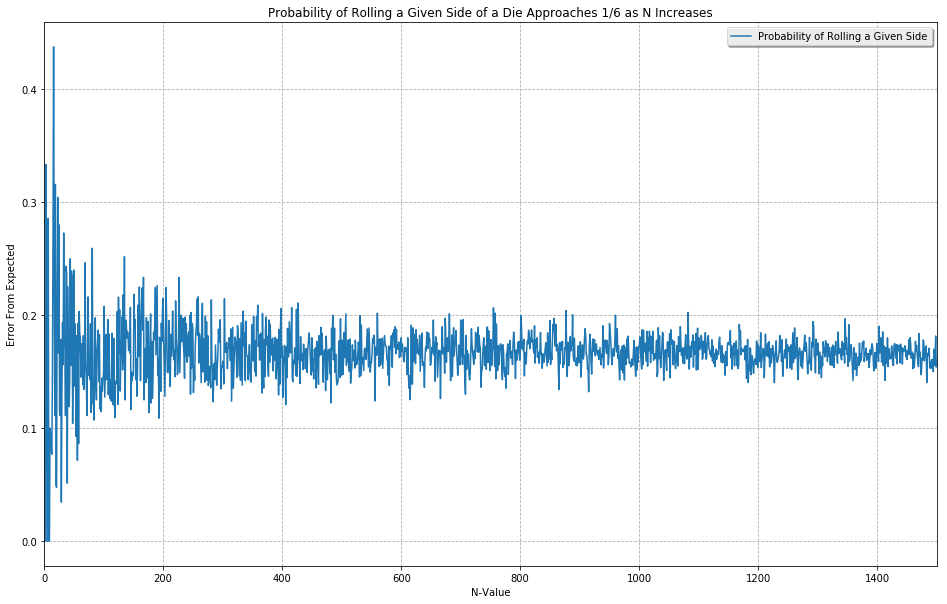

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('N-Value')
plt.ylabel('Error From Expected')
plt.title('Probability of Rolling a Given Side of a Die Approaches 1/6 as N Increases')
plt.grid(linestyle='dashed')
plt.xlim(0,1500) # Limiting x-axis to within the defined N values

# Gathering Values

N_vals = []
R_1_Vals = []



for i in range(1,1501): #From one roll to 1500
  N_vals.append(i)
  R_1_Vals.append(die_outcomes(i,1)[1] )
  
# Trendline information

z_vals = np.polyfit(N_vals, R_1_Vals, 1)
p = np.poly1d(z_vals)

#Plotting Values and Associated Trendline
plt.plot(N_vals,R_1_Vals,label = 'Probability of Rolling a Given Side') # Plotting values of N against r in a scatter plot
plt.plot()

# Legend Settings
legend = plt.legend( loc = 1 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Another way to think about this trend is to analyze how the calculated probability differs from expected values. That is, for a given probability value p calculated at the value N what is the difference between p and (1/6)? This will tell us in what fashion our probability approaches the expected value. Let us start by removing all "zero" values from our list probability errors. The reason we wish to do this is because they create an error when we wish to delineate the trend line. The information below does this:

In [0]:
def value_remover(x_vals, y_vals, output):
  
  """
  
  
  -- General Description --
  
  The purpose of this function is to remove values from a list that will cause problems in the log-log space. More specificall, these will
  be values to large inverse powers that are relatively close to zero.
  
  -- How it Works --
  
  This function works by first preparing all values in specified lists. It will then impose conditions on the lists, if a value is 
  greater than the specified number to ignore it will return a value of true; otherwise, it will be false. np.logical will then compare
  the two lists for us. If a value in y_vals does NOT meet the critera it will return the value of false. On the other hand our values
  of N will always be true. As such, when np.logical compares a false and true it will deem them as non-equatable and return a false. 
  It will return an array that is the same length as both the x_vals and y_vals. Following this it will then append the true/false list
  to the original lists, and it will REMOVE the elements in both x_values and y_values that do not meet our specified criteria.
  
  -- Parameters --
  
  x_vals = The list of values for which you anticipate plotting on the x-axis
  y_vals = The list of values for which you anticipate plotting on the y-axis
  output = The data you would like th function to output. 1 = Reduced x-axis values, 2 = reduced y-axis values
  
  
  """
  
  # --- Preparing Lists as np arrays for future manipulation ---
  val1 = np.array(x_vals)
  val2 = np.array(y_vals)
  
  # --- Imposing conditions on values ---
  a,j = val1 >= 1e-5 , val2 >=1e-5
  
  # --- Checking to see if the various elements meet the required conditions ---
  True_False_List = np.logical_and(a,j) # checking to see if the statements are true
  
  # --- Returning Lists and Removing Unecessary Values ---
  if output == 1:
    return val1[True_False_List]
  
  if output == 2:
    return val2[True_False_List]
  
  else:
    Print('Please refer to the documentation to recieve a proper output. 1 = Adjusted x-values, 2 = Adjusted y-values')

Now that we have removed all the necessary values we can go ahead and plot the trendline.

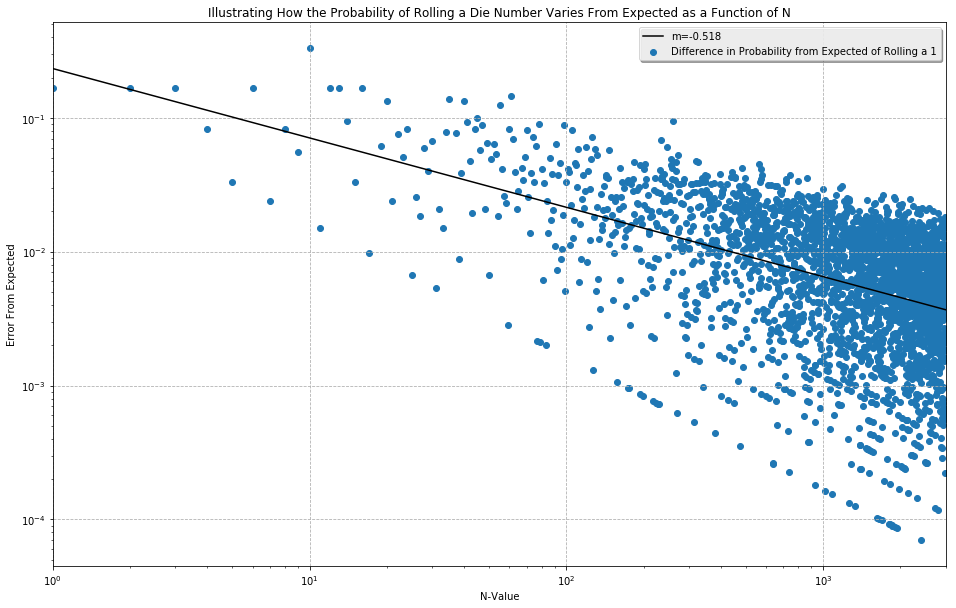

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('N-Value')
plt.ylabel('Error From Expected')
plt.title('Illustrating How the Probability of Rolling a Die Number Varies From Expected as a Function of N')
plt.grid(linestyle='dashed')
#plt.ylim(0.0001,1)
plt.xlim(1,3000)
plt.yscale('log')
plt.xscale('log')

# Gathering Values

N_vals = []
R_1_Vals = []


for i in range(1,3001): #From one roll to 3001
  N_vals.append(i)
  R_1_Vals.append(die_outcomes(i,2)[1] )
  
Adjusted_N = value_remover(N_vals, R_1_Vals,1) # Accounting for small probability values
Adjusted_R = value_remover(N_vals, R_1_Vals,2) # Accounting for small probability values


# Generating Trend Line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress( np.log10(Adjusted_N) , np.log10(Adjusted_R) )

# can also use polyfit if you would like, just placing this here for extra information
#slope_n, intercept_n = np.polyfit( np.log10(Adjusted_N) , np.log10(Adjusted_R) , 1) # Will not be used in this example


#Plotting Values and Associated Trendline
plt.scatter(Adjusted_N,Adjusted_R,label = 'Difference in Probability from Expected of Rolling a 1') # Plotting values of N against r in a scatter plot
plt.plot(Adjusted_N , 10**(slope*np.log10(Adjusted_N) + intercept), label ='m=' + str(round(slope,3)), color='black')

# Legend Settings
legend = plt.legend( loc = 1 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

In [0]:
print( "The slope of the error from expected on a log-log plot is:", round(slope,4) )

The slope of the error from expected on a log-log plot is: -0.5182


The slope of the log-log linear fit is approximately -0.5 (with some error based on random tosses of the dice, but if we did this for an extremely large N it would be equivalent to -0.5). This slope is telling us is that the error between expected and derived values will eventually reach zero as N -> infinity. As such, as we increase the number of roles of our die the expected probability of rolling a given side will eventually reach 1/6. This is consistent with what we expected.

## Problem 2: Macrostate Probabilities

Calculate the macrostate probability $P(n_1)$ for a coin, and plot the function against $n_1$ for a few large values of $N$ ($N\approx 100 - 200$). Show that the function is well-approximated by a Gaussian centered at $n_1=N/2$ with a width scaling like $1/\sqrt{N}$.

If the coin is unfair, so that $p$ is the probability of obtaining heads and $q$ is the probability of obtaining tails, we still need $p+q=1$. But now if there are $N$ events, made up of $n_1$ head outcomes and $n_2$ tail outcomes ($N=n_1+n_2$), the microstate probability $P_{\rm micro}$ is
$$P_{\rm micro}=P_{\rm micro}(n_1)=p^{n_1}q^{n_2}=p^{n_1}(1-p)^{N-n_1}.$$

We are only interested in the probability of obtaining $n_1$ heads and $n_2=N-n_1$ tails, *irrespective of the order*. We need to count all of the microstates satisfying this condition. The resulting macrostate probability is then $P_{\rm macro}(n_1)=\Omega(n_1)p^{n_1}q^{N-n_1}$, where $\Omega(n_1)$ is the number of ways of arranging
$n_1$ events with $p$ and $N-n_1$ events with $q$. We also know that the sum over all macrostate probabilities should also be unity:
$$\sum_{n_1}P_{\rm macro}(n_1)=\sum_{n_1}\Omega(n_1)p^{n_1}q^{N-n_1}=1.$$
Let's use the binomial theorem:
$$(p+q)^N=1=\sum_{n=0}^N\left({N!\over n!(N-n)!}\right)p^nq^{N-n}.$$
Comparison of the two displayed equations above shows that the number of ways of distributing microstates in a macrostate is given by:
$$\Omega(N,n)={N!\over n!(N-n)!}\equiv\pmatrix{N\cr n}.$$

Let us now create a few functions. First, a function to perform the operation of finding $\Omega(N,n)=\pmatrix{N\cr n}$. 

Next, a function to perform a coin toss $N$ times and a function to count the number of heads tossed out of the $N$ tosses.

Then a function will calculate the probability of the macrostate of $N$ tosses with $n_1$ head outcomes.

Finally a sort of 'main' function to find $n_1$ head outcomes and their associated probability for the same $N$ tosses. This main function will do this 1000 times in order to have sufficient runs to produce a few macrostates with few $n_1$ and large $n_1$. This is because the associated macrostate probability for small or large $n_1$ is small, so we need many runs to produce such a macrostate.

In [0]:
def N_choose_n(N, n):
  """
  Finds the mathematical result of N choose n
  
  N, n >= 0 and N >= n
  """
  return int(np.math.factorial(N) / (np.math.factorial(n)*np.math.factorial(N-n)))

def N_coin_tosses(N):
  """
  Tosses a coin N times
  
  Returns a list of elements where
  0 represents a coin toss to be heads
  1 represents a coin toss to be tails
  """
  toss_list = []
  for i in range(N):
    toss_list.append(np.random.randint(0,2))
  return toss_list

def heads_counter(toss_list):
  """
  Counts the number of 0's in a list
  
  Meant to be used with N_coin_tosses to find n1
  """
  n1 = 0
  for j in toss_list:
    if j == 0:
      n1 += 1
  return n1

def macro_prob_of_heads(N, p):
  """
  Tosses a coin N times, counts the number of resulting heads,
  calculates and returns the probability of the macrostate of N tosses with n1 heads
  """
  n1 = heads_counter(N_coin_tosses(N))
  return n1, (N_choose_n(N, n1)) * ((p)**n1) * ((1-p)**(N-n1))

def N_tosses_1000_times(N):
  """
  Performs N coin tosses 1000 times and returns each macrostate as the
  number of heads and the associated probability of each macrostate
  """
  n1_list = []
  P_list = []
  for i in range(1000):
    n1, P = macro_prob_of_heads(N, 1/2)
    n1_list.append(n1)
    P_list.append(P)
  return n1_list, P_list

Now that the functions for the coin tosses are made, let us create the functions to generate the Gaussian distributions to fit the probability densities for $N$ coin tosses in the range $N = 100-200$.

In general, a normalized Gaussian distribution is given by the function 

$$\sqrt{\frac\tau{2\pi}} e^{-\tau(x-\mu)^2/2}$$

where $\tau$ is the width scaling and $\mu$ is the mean or expectation of the distribution.

In [0]:
def Gaussian_func(x, c, s):
  """
  x = input value from domain
  c = centered about (mean value)
  s = width scaling
  """
  return np.sqrt(s/(2*np.pi)) * np.exp(-(s/2)*((x-c)**2))

def find_max_min(list):
  """
  This function finds the maximum and minimum elements in a list.
  It will be used to find max and min n1 in order to plot the
  Gaussian function nicely.
  """
  list = sorted(list)
  return list[0], list[-1] #Returns min, max

Now we will show the plots of the data overlayed with their associated Gaussian approximations.

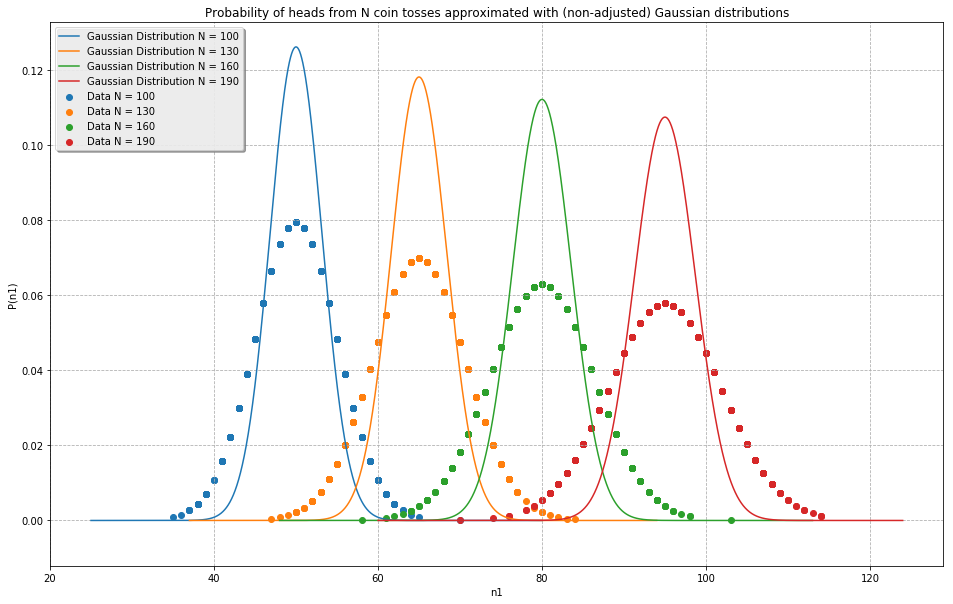

In [0]:
#Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('n1')
plt.ylabel('P(n1)')
plt.title('Probability of heads from N coin tosses approximated with (non-adjusted) Gaussian distributions')
plt.grid(linestyle='dashed')

#Plotting the Function for N = 100, 130, 160, 190
for N in range(100, 220, 30):
  n1_list, P_list = N_tosses_1000_times(N)
  plt.scatter(n1_list, P_list, label = 'Data N = ' + str(N))
  xmin, xmax = find_max_min(n1_list)
  x = np.arange(xmin-10, xmax+10, 0.01)
  plt.plot(x, Gaussian_func(x, N/2, 1/np.sqrt(N)) , label = 'Gaussian Distribution N = ' + str(N))
  
#Legend Settings
legend = plt.legend( loc = 2 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

It is worth noting that for very large values of $N$, we do expect $\tau = \frac{1}{\sqrt{N}}$. However since to calculate the macrostate probability for a given $N$ tosses, we must perform the operation $N!$, the computer itself is not able to handle a number as large as $100000!$. This means using values of $N$ in the range $N = 100-200$ does not suffice to be considered large $N$ and explains why the Gaussian approximations in the plot are not precise enough.

We were given $\mu = N/2$ and $\tau = \frac{1}{\sqrt{N}}$, however we found an interesting trend that generates a Gaussian distribution which closer fits the data. Here is the first trend we found:

>N tosses | $\tau$
>--- | ---  
>50 | $\frac{2}{4\sqrt{N}}$
>100 | $\frac{2}{5\sqrt{N}}$
>150 | $\frac{2}{6\sqrt{N}}$
>200 | $\frac{2}{7\sqrt{N}}$

Looking deeper into this trend, we found:

>N tosses | $\tau$
>--- | ---  
>50 | $\frac{2}{4\sqrt{N}}$
>60 | $\frac{200}{(400-70)\sqrt{N}}$
>70 | $\frac{200}{(400-50)\sqrt{N}}$
>80 | $\frac{200}{(400-30)\sqrt{N}}$
>90 | $\frac{200}{(400-10)\sqrt{N}}$
>100 | $\frac{2}{5\sqrt{N}}$
>110 | $\frac{200}{(500-70)\sqrt{N}}$
>120 | $\frac{200}{(500-50)\sqrt{N}}$
>130 | $\frac{200}{(500-30)\sqrt{N}}$
>140 | $\frac{200}{(500-10)\sqrt{N}}$
>150 | $\frac{2}{6\sqrt{N}}$
>160 | $\frac{200}{(600-70)\sqrt{N}}$
>170 | $\frac{200}{(600-50)\sqrt{N}}$
>180 | $\frac{200}{(600-30)\sqrt{N}}$
>190 | $\frac{200}{(600-10)\sqrt{N}}$
>200 | $\frac{2}{7\sqrt{N}}$

Thus we will generate $\tau$ to fit this trend and generate better fitting Gaussian distributions. To do this we will create a function that finds the proper width scaling for a certain number of $N$ tosses of the coin.

In [0]:
def find_Gaussian_s(N):
  """
  Returns a value for the width scaling to be used in the Gaussian distribution
  according to the 'bins' described above.
  """
  itera = 0
  for i in range(N+1):
    if i % 50 == 0:
      itera += 1
  fac = 300 + (itera*100)
  itera = 0
  for j in range(N % 50):
    if j % 10 == 0:
      itera += 1
  rem = 90 - (itera*20)
  return 200/((fac-rem)*np.sqrt(N))

Now let us again plot the data with the fixed Gaussian approximations.

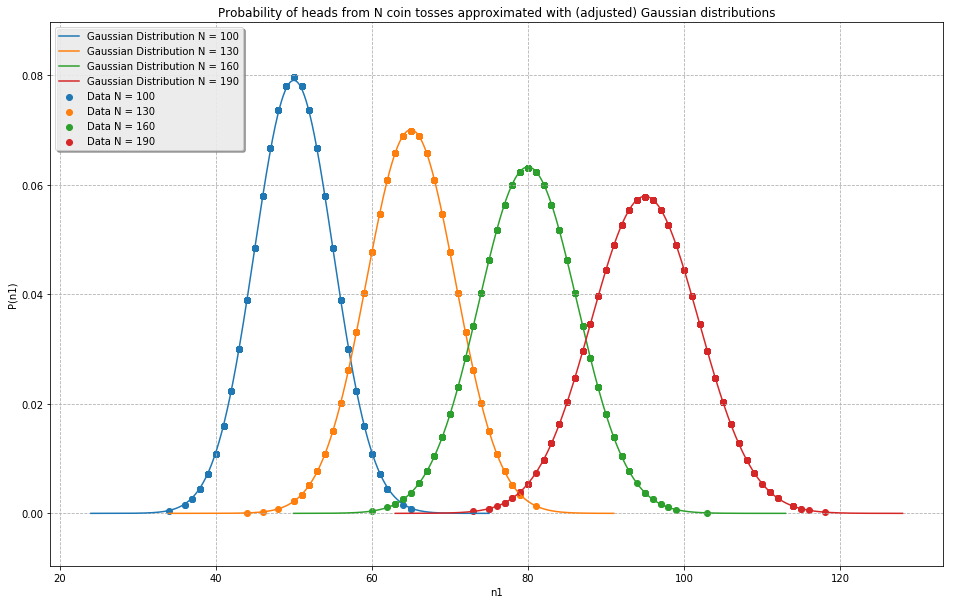

In [0]:
#Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('n1')
plt.ylabel('P(n1)')
plt.title('Probability of heads from N coin tosses approximated with (adjusted) Gaussian distributions')
plt.grid(linestyle='dashed')

#Plotting the Function for N = 100, 130, 160, 190
for N in range(100, 220, 30):
  n1_list, P_list = N_tosses_1000_times(N)
  plt.scatter(n1_list, P_list, label = 'Data N = ' + str(N))
  xmin, xmax = find_max_min(n1_list)
  x = np.arange(xmin-10, xmax+10, 0.01)
  plt.plot(x, Gaussian_func(x, N/2, find_Gaussian_s(N)) , label = 'Gaussian Distribution N = ' + str(N))
  
#Legend Settings
legend = plt.legend( loc = 2 , shadow = 'true')
frame = legend.get_frame()
frame.set_alpha(0.8)

Much better Gaussian approximations! Again, the reason these prefactors are needed is likely due to N not being sufficiently large enough to suffice for large number approximations.

## Problem 3: Lossless image compression
Consider the photograph Feder.tif; you can find this in the Resources folder in D2L. This was taken on a 14 megapixel camera, and each pixel has an 8-bit value. In other words, the greyscale takes values between 0 (minimum or black) and $2^8-1=255$ (maximum or white). Because each byte is 8 bits, the total size of the file is about 14 Mb (each pixel stores one byte of data). 

**Problem:** Using Python, obtain the image histogram, i.e. the relative abundances of pixel values (the number of pixels in the image with a particular byte value). For example it should list the number of black pixels with value 0, the number of almost-black
pixels with value 1, etc.

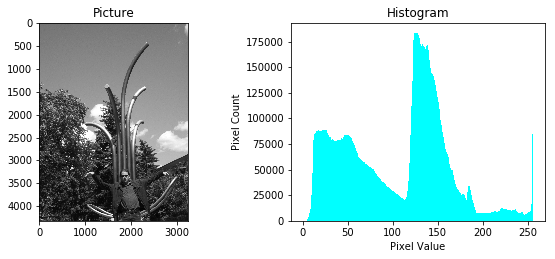

In [0]:
# Import the image (Open through colab Files->Upload)
img = Image.open('Feder.tif')
img_array = np.array(img) # Turn the TIF image into a numpy array

# Plotting the image
f = plt.figure(figsize=(10,8))
f.add_subplot(221)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title('Picture')

# Plot the histogram
f.add_subplot(222)
plt.hist(img_array.flatten(), 256, range=(0,256), color = 'cyan')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')

plt.show()


**Problem:** Convert the image into another image file format (such as jpg, gif, png, etc.), and compare the resulting sizes with that obtained in (a). Given that file compression must be lossless, how does the size reduction compare with Shannon's theorem? What can you infer about various kinds of image formats?


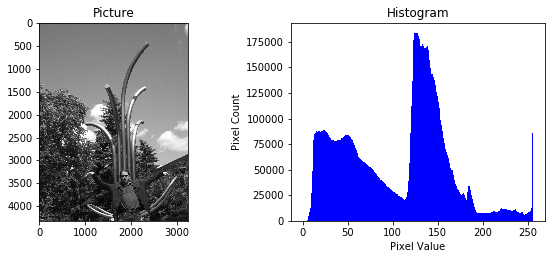

In [0]:
# Change the image type from .tif to .jpg
img.save('Feder.jpg')
img_jpg = Image.open('Feder.jpg')

img_array_jpg = np.array(img_jpg)

# Create another histogram plot to compare the previous results with.
# Plotting the image
f1 = plt.figure(figsize=(10,8))
f1.add_subplot(221)
plt.imshow(img_jpg, cmap=plt.get_cmap('gray'))
plt.title('Picture')

# Plot the histogram
f1.add_subplot(222)
plt.hist(img_array_jpg.flatten(), 256, range=(0,256), color = 'blue')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')

plt.show()

Here, we see that the histogram for the new .jpg file remains the same as the histogram for the .tif file. The .tif file, which has a size of 13.3 MB, gets compressed down to 1.24 MB in .jpg format. This is consistent with the idea of lossless image compression, as we contain the pixel abundances while compressing the image to a smaller file size. In regards to Shannon's theorem, we know that it is not possible to compress data such that the average number of bits per symbol is less than the Shannon entropy, without information loss. With the format change to .jpg, we have compressed the image to a more efficient size which minimizes the number of bits we need to transmit and store (that size matching the Shannon entropy).

If we look at other image formats, such as GIF, BMP, or PNG, they can be categorized similarly as lossless compression, or also as lossy compression, where we do not keep a perfect copy of the image, but achieve a much smaller file size; this sacrifices image quality. 

**Problem:** Using Python, write an algorithm that
implements a Huffman encoding scheme based on the relative abundances of the pixel values in the image. Use this to obtain an improved digital representation of the pixel values. Ensure that your code prints out the binary representation for each pixel value from 0 to 255. Calculate the mean length of the bitstrings encoding the pixel values, and therefore the size of the image using this encoding. How do the results compare with those obtained in (a) and (b)? How does the mean bitstring length compare to the predictions based on Shannon's theorem? Comment.

In [0]:
def HuffmanCode(pixcounter):
  """
  ----------
  Function that encodes the given counter (found through Counter function), 
  mapping pixel values to their to weight values (see histogram) and the corresponding
  Huffman code.

  We use the Heap queue algorithm to sort things in a priority que.
  
  ----------
  
  """
  heap = [[weight, [pix, ""]] for pix, weight, in pixcounter.items()] # Define our "heap" list
  heapify(heap) # Transforms our list into a linear time heap
  
  while len(heap) > 1:
      low = heappop(heap) # "Pop" and return the smallest item from the heap
      high = heappop(heap)
     
      for pair in low[1:]:
          pair[1] = '0' + pair[1]
      for pair in high[1:]:
          pair[1] = '1' + pair[1]
      heappush(heap, [low[0] + high[0]] + low[1:] + high[1:]) # Push the given item onto the heap
      # (heappush(heap,item))
  
  return (heappop(heap)[1:])

# Compute the histogram of pixels in the image
hist = np.bincount(img_array.ravel(), minlength = 256) # Counts the number of occurences of each value in the array
prob = hist / np.sum(hist) # Probabilities from frequencies

pixcounter = Counter(hist) # Use the Counter function to create a dictionary subclass
# which counts hashable objects

# Use our encoding function
huffman = HuffmanCode(pixcounter)

# Print Pixels ranging from 0-255 with corresponding weight and bitstring
print ("Pixel\tWeight\tHuffman Code")
for i in huffman:
  val = np.where(hist == i[0])
  print ("%s\t%s\t%s" % (val[0], i[0], i[1]))

Pixel	Weight	Huffman Code
[0]	0	00000000
[1]	3	00000001
[2]	11	00000010
[3]	17	00000011
[4]	146	00000100
[5]	1293	00000101
[6]	4185	00000110
[246]	6099	00000111
[247]	6212	00001000
[248]	6726	00001001
[245]	7096	00001010
[198]	7205	00001011
[199]	7226	00001100
[7]	7255	00001101
[249]	7283	00001110
[202]	7286	00001111
[201]	7301	00010000
[203]	7328	00010001
[200]	7434	00010010
[197]	7452	00010011
[196]	7496	00010100
[240]	7605	00010101
[205]	7607	00010110
[204]	7612	00010111
[195]	7659	00011000
[206]	7832	00011001
[207]	7838	00011010
[194]	7852	00011011
[241]	7897	00011100
[193]	7912	00011101
[239]	8029	00011110
[208]	8051	00011111
[244]	8120	00100000
[243]	8213	00100001
[209]	8286	00100010
[242]	8349	00100011
[215]	8456	00100100
[250]	8562	00100101
[216]	8626	00100110
[192]	8701	00100111
[238]	8718	00101000
[210]	8762	00101001
[251]	8987	00101010
[211]	9041	00101011
[217]	9096	00101100
[214]	9137	00101101
[252]	9177	00101110
[212]	9720	00101111
[237]	9789	00110000
[213]	9860	00110001
[

To calculate the mean bitstring length, we use the Shannon entropy equation known as

$$ H(X) = - \sum_{i=1}^{m}p_i \log_2(p_i) $$

In [0]:
# Recall the list of probabilities 
prob = hist / np.sum(hist) 

H = []

for k in prob:
  if k == 0:
    pass
  else:
    entropy = - (k) * np.log(k)
    H.append(float((entropy)))
  
average = np.nansum(H) # treats NaN's as zero
print("Average bitstring length: ", "%.5f" % average, "bits.")

print("Total number of pixels = ", np.sum(hist), "pixels.")

print("Total number of bits = ", np.sum(hist) * 8, "bits.") # 8 bits per pixel

#This time using our average bit stringth length
print("Total number of bits (using average bit string length) = ", "%.5f" % (np.sum(hist) * average), "bits.")

# Lastly, find the image size:
megabyte = 8e6
print("Image size: ", "%.5f" % (np.sum(hist) * average /megabyte) , "MB.")

Average bitstring length:  5.17295 bits.
Total number of pixels =  13996800 pixels.
Total number of bits =  111974400 bits.
Total number of bits (using average bit string length) =  72404739.17986 bits.
Image size:  9.05059 MB.


Thus, the size of the image determined through using this encoding method is 9.05 MB, down from 13.3 MB (.tif file size). This means we have compressed the image size with no loss of data. In part (b), the converted .tif file into .jpg format yielded a size of 1.24 MB, which is much smaller. 

By looking at the mean bit string length, we have reduced the size down from 8 bits to 5.17, through means similar to the example given in the notes (2.2.4 Boltzmann and Shannon Entropy). This result is consistent with what we expect from Shannon entropy and it's application to provide efficiency.